# **Probabilitas Partikel**

Islamuddin Alimurrijal

Densitas probabilitas suatu sistem kuantum adalah $P(x) = |\psi (x)|^2 $ dan peluang untuk menemukan partikel pada daerah tertentu di dalam suatu sumur potensial dinyatakan sebagai berikut.
\begin{align}
P(x_1 \le x \le x_2) = \int_{x_1}^{x_2} |\psi (x)|^2 dx 
\end{align}

Di bawah ini adalah program menyelesaikan bentuk integrasi di atas dengan menggunakan metode integrasi Simposon 1/3.

Dengan menentukan nilai batas bawah $x_1$ dan mengunggah file fungsi gelombang (psi.dat), peluang partikel dapat ditentukan pada setiap tingkat energi.

### Peluang partikel pada daerah tertentu

In [ ]:
#Import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def export_data(filename):
  '''
  Export data of x and psi, and calculates psi*psi
  Input   : filename
  Return  : x, psi, psi*psi
  '''
  data = np.loadtxt(filename)

  #Make lists to store x and psi value
  x = []
  psi = []
  psi2 = []

  for i in range(len(data)):
    x.append(data[i][0])
    psi.append(data[i][1])
    psi2.append(data[i][1]*data[i][1])

  return x, psi, psi2

In [ ]:
def integrate(xpos, psi2, xlim):
  '''
  Calculates the probability using Simpson 1/3 integration method
  Input   :X data, psi^2 data, x boundary
  Return  : probability
  '''

  xmin = min(xpos)
  h = abs(x[2]-x[1])/2
  dx = abs(x[2]-x[1])
  prob1, prob2 = 0, 0
  
  for i in range(len(xpos)-2):
    #Probability of the first region
    if xmin <= xlim:
      prob1 = prob1 + (psi2[i] + 4*psi2[i+1] + psi2[i+2])
      xmin = xmin + dx

    #Probability of the second region
    else:
      prob2 = prob2 + (psi2[i] + 4*psi2[i+1] + psi2[i+2])
      xmin = xmin + dx

  prob1 = prob1 * h/3
  prob2 = prob2 * h/3

  return prob1, prob2

In [ ]:
#Initialize Parameters
xlim = 0.6 #lower interval
n = 10 #number of energy level
energy_level = [i for i in range(1, n+1)]

prob1 = [] #Probability in the first region
prob2 = [] #Probability in the second region
probtot = []
filename = 'psi-outb' #Change according to files uploaded

for i in energy_level:
  x, psi, psi2 = export_data(filename+str(i)+'.dat')
  p1, p2 = integrate(x, psi2, xlim)

  prob1.append(p1)
  prob2.append(p2)
  probtot.append(p1+p2)

output = pd.DataFrame(columns=['Energy Level', 'Probability 1', 'Probability 2', 'Probability Total'])

for i in range(len(energy_level)):
  output.loc[i] = [energy_level[i], prob1[i], prob2[i], probtot[i]]

output

,Energy Level,Probability 1,Probability 2,Probability Total
0,1.0,0.996969,0.003030,0.999999
1,2.0,0.975481,0.024514,0.999995
2,3.0,0.848750,0.151242,0.999993
3,4.0,0.575138,0.424876,1.000014
4,5.0,0.562611,0.437538,1.000149
5,6.0,0.553423,0.447069,1.000492
6,7.0,0.569442,0.431533,1.000975
7,8.0,0.613813,0.387695,1.001509
8,9.0,0.591335,0.410776,1.002111
9,10.0,0.633346,0.369385,1.002731


### Plot grafik

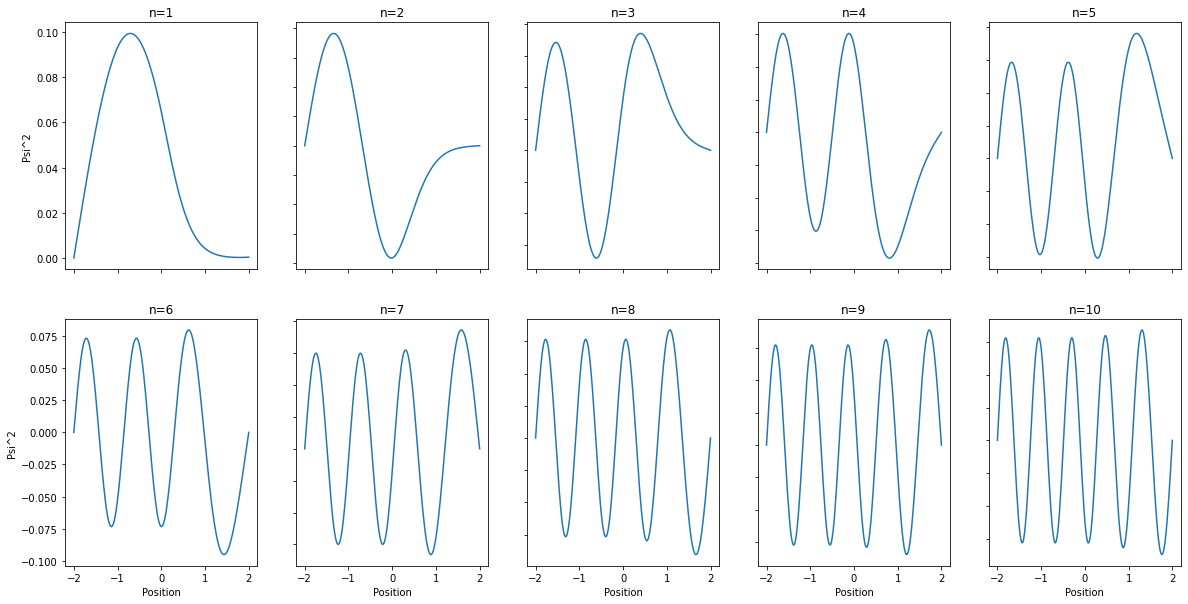

In [ ]:
#Plot probability density

fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for n in range(1, 11):
  data = np.loadtxt(filename+str(n)+'.dat', unpack=True)
  x_pos = data[0]
  psii = data[1]*psi[1]

  if n < 6:
    ax[0, n-1].plot(x_pos, psii)
    ax[0, n-1].set_title('n='+ str(n))
  else:
    ax[1, n-6].plot(x_pos, psii)
    ax[1, n-6].set_title('n='+ str(n))

for axis in ax.flat:
  axis.set(xlabel='Position', ylabel='Psi^2')

for axis in ax.flat:
    axis.label_outer()

plt.show()